In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import joblib as jb
from lightgbm import LGBMRegressor
import math
import cv2
import matplotlib.patches as mpatches
import colorsys

In [2]:
transect_data_path = '../data/generated/transect_data/'
data_path = '../data/generated/'

In [9]:
pred = jb.load(f'{data_path}predict_rf_baseline.pkl.z')
pred

array([ 4.82172135,  8.9885598 ,  7.66528392, ...,  2.11175527,
       15.67324274,  7.14616084])

In [8]:
xval = jb.load(f'{data_path}xval_bestmodel.pkl.z')
xval

,b1,b2,b3,b4,b5,b6,b7,b8,b2b4,b3b4,ndwi15,ndwi24,ndwi53,cspmb7,kbins_coords_x,kbins_coords_y,x,y,z
6383,0.1204,0.0921,0.0711,0.0476,0.0390,0.0261,0.0230,0.0198,1.170870,1.103876,0.510665,0.318540,-0.291553,17.647642,6.0,13.0,870,546,2.995000
10019,0.1226,0.0935,0.0726,0.0454,0.0378,0.0252,0.0224,0.0189,1.189345,1.123038,0.528678,0.346292,-0.315217,17.025840,8.0,7.0,1061,1015,6.083214
8380,0.1253,0.0944,0.0759,0.0498,0.0419,0.0253,0.0240,0.0189,1.163645,1.107830,0.498804,0.309293,-0.288625,18.696860,7.0,9.0,972,900,4.624286
14471,0.1242,0.0954,0.0740,0.0460,0.0366,0.0243,0.0229,0.0171,1.190521,1.124176,0.544776,0.349363,-0.338156,17.543602,12.0,14.0,1542,440,9.088077
13091,0.1253,0.0986,0.0785,0.0584,0.0514,0.0312,0.0305,0.0247,1.128772,1.072722,0.418223,0.256051,-0.208622,25.883137,11.0,15.0,1385,373,4.519737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13345,0.1224,0.0934,0.0716,0.0439,0.0376,0.0243,0.0220,0.0180,1.199628,1.129347,0.530000,0.360524,-0.311355,16.614589,11.0,14.0,1414,421,6.867500
11465,0.1222,0.0922,0.0725,0.0441,0.0380,0.0258,0.0240,0.0197,1.194773,1.131291,0.525593,0.352898,-0.312217,18.696860,9.0,12.0,1195,606,11.419600
4424,0.1219,0.0892,0.0663,0.0414,0.0382,0.0241,0.0218,0.0184,1.206162,1.126477,0.522798,0.366003,-0.268900,16.409959,5.0,12.0,765,606,1.993077
17965,0.1256,0.0973,0.0765,0.0423,0.0353,0.0251,0.0233,0.0198,1.222446,1.158221,0.561218,0.393983,-0.368515,17.960730,16.0,19.0,1910,81,14.831923


In [10]:
xval['z_pred'] = pred
xval

,b1,b2,b3,b4,b5,b6,b7,b8,b2b4,b3b4,ndwi15,ndwi24,ndwi53,cspmb7,kbins_coords_x,kbins_coords_y,x,y,z,z_pred
6383,0.1204,0.0921,0.0711,0.0476,0.0390,0.0261,0.0230,0.0198,1.170870,1.103876,0.510665,0.318540,-0.291553,17.647642,6.0,13.0,870,546,2.995000,4.821721
10019,0.1226,0.0935,0.0726,0.0454,0.0378,0.0252,0.0224,0.0189,1.189345,1.123038,0.528678,0.346292,-0.315217,17.025840,8.0,7.0,1061,1015,6.083214,8.988560
8380,0.1253,0.0944,0.0759,0.0498,0.0419,0.0253,0.0240,0.0189,1.163645,1.107830,0.498804,0.309293,-0.288625,18.696860,7.0,9.0,972,900,4.624286,7.665284
14471,0.1242,0.0954,0.0740,0.0460,0.0366,0.0243,0.0229,0.0171,1.190521,1.124176,0.544776,0.349363,-0.338156,17.543602,12.0,14.0,1542,440,9.088077,9.689526
13091,0.1253,0.0986,0.0785,0.0584,0.0514,0.0312,0.0305,0.0247,1.128772,1.072722,0.418223,0.256051,-0.208622,25.883137,11.0,15.0,1385,373,4.519737,4.157144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13345,0.1224,0.0934,0.0716,0.0439,0.0376,0.0243,0.0220,0.0180,1.199628,1.129347,0.530000,0.360524,-0.311355,16.614589,11.0,14.0,1414,421,6.867500,5.175444
11465,0.1222,0.0922,0.0725,0.0441,0.0380,0.0258,0.0240,0.0197,1.194773,1.131291,0.525593,0.352898,-0.312217,18.696860,9.0,12.0,1195,606,11.419600,10.077409
4424,0.1219,0.0892,0.0663,0.0414,0.0382,0.0241,0.0218,0.0184,1.206162,1.126477,0.522798,0.366003,-0.268900,16.409959,5.0,12.0,765,606,1.993077,2.111755
17965,0.1256,0.0973,0.0765,0.0423,0.0353,0.0251,0.0233,0.0198,1.222446,1.158221,0.561218,0.393983,-0.368515,17.960730,16.0,19.0,1910,81,14.831923,15.673243


In [11]:
df_data = xval
df_data['error'] = df_data['z_pred'] - df_data['z']
df_data['abs_error'] = abs(df_data['error'])

In [12]:
df_result = df_data.drop(['b1','b2','b3','b4','b5','b6','b7','b8','b2b4','b3b4','ndwi15','ndwi24','ndwi53','kbins_coords_x','kbins_coords_y'],axis=1)

In [13]:
df_result['z_mean_rd'] = df_result['z'].apply(np.floor)

In [14]:
df_depth = df_result.drop(['x','y','z_pred','z'],axis=1).groupby('z_mean_rd').mean().reset_index()
df_depth.columns = ['depth_round_down','cspm','mean_error','mean_abs_error']
df_depth

,depth_round_down,cspm,mean_error,mean_abs_error
0,1.0,20.538312,1.785858,1.787435
1,2.0,21.247336,1.312611,1.342033
2,3.0,21.708915,1.098810,1.228371
3,4.0,21.454342,0.836821,1.033230
4,5.0,20.174773,0.574702,1.051730
5,6.0,19.344602,0.198485,1.200933
6,7.0,19.391114,-0.027385,1.136747
7,8.0,18.749881,-0.144748,1.214563
8,9.0,18.786801,-0.611360,1.540412
9,10.0,18.888665,-0.889402,1.585307


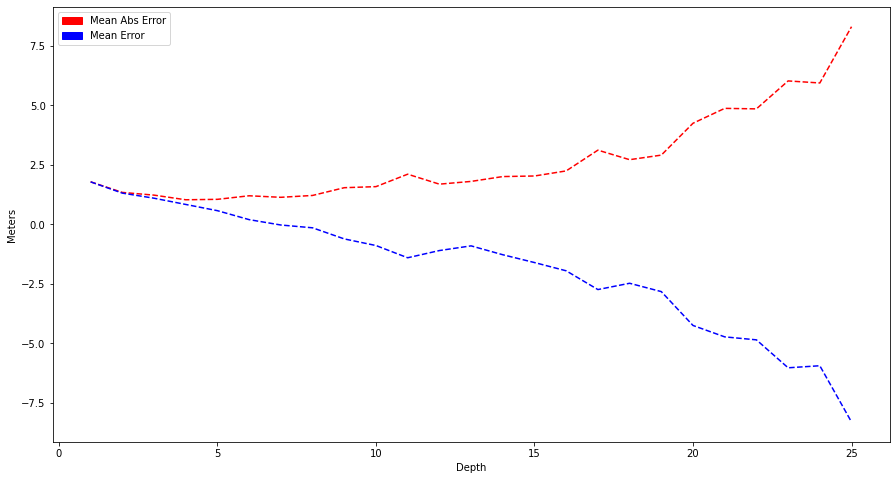

In [16]:
plt.figure(figsize=(15,8))
plt.plot(df_depth['depth_round_down'], df_depth['mean_abs_error'], 'r--', df_depth['depth_round_down'], df_depth['mean_error'], 'b--')
red = mpatches.Patch(color='red', label='Mean Abs Error')
blue = mpatches.Patch(color='blue', label='Mean Error')
plt.legend(handles=[red,blue])
plt.xlabel("Depth")
plt.ylabel("Meters")
plt.savefig(f'{data_path}chart_mean_error.jpg')
plt.show()

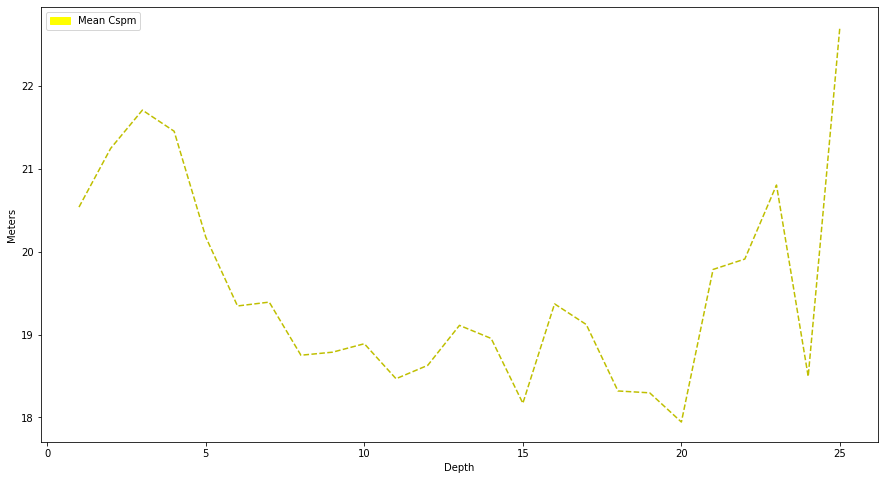

In [17]:
plt.figure(figsize=(15,8))
plt.plot(df_depth['depth_round_down'], df_depth['cspm'], 'y--')
yellow = mpatches.Patch(color='yellow', label='Mean Cspm')
plt.legend(handles=[yellow])
plt.xlabel("Depth")
plt.ylabel("Meters")
plt.savefig(f'{data_path}chart_mean_cspm.jpg')
plt.show()

In [18]:
def find_transect(x_s,y_s,x_e,y_e,df):
    transect = list()
    angle = math.atan2(y_s-y_e, x_s-x_e)
    low_x, high_x = (x_s, x_e) if x_s < x_e else (x_e, x_s)
    low_y, high_y = (y_s, y_e) if y_s < y_e else (y_e, y_s)
    df_t = df[(df['x'] >= low_x) & (df['x'] <= high_x)]
    df_t = df_t[(df_t['y'] >= low_y) & (df_t['y'] <= high_y)]
    for i, row in enumerate(df_t.itertuples()):
        x = row[-6]
        y = row[-5]
        angle2 = math.atan2(y-y_e,x-x_e)
        if abs(angle2 - angle) < 0.05:
            transect.append(row)
    return transect
    

In [19]:
base_image = cv2.imread('../data/generated/rgb_image.jpg')

In [124]:
transects_image = base_image.copy()
for i, row in enumerate(df_data.itertuples()):
    x = row[1]
    y = row[2]
    transects_image[y][x] = [255,255,255]
cv2.imwrite('../data/generated/bat_transects.jpg',transects_image)

True

In [125]:
df_data

,x,y,z,b1,b2,b3,b4,b5,b6,b7,b8,b2b4,b3b4,ndwi15,ndwi24,ndwi53,cspmb7,z_pred,error,abs_error
0,233,1130,3.195862,0.1199,0.0866,0.0667,0.0464,0.0490,0.0316,0.0283,0.0238,1.162614,1.094573,0.419775,0.302256,-0.152982,23.382784,3.275670,0.079808,0.079808
1,233,1131,3.273030,0.1199,0.0880,0.0668,0.0457,0.0490,0.0316,0.0283,0.0237,1.171434,1.099318,0.419775,0.316380,-0.153713,23.382784,3.244124,-0.028906,0.028906
2,233,1132,3.299687,0.1199,0.0879,0.0666,0.0461,0.0488,0.0324,0.0281,0.0238,1.168473,1.096035,0.421458,0.311940,-0.154246,23.158824,3.326227,0.026540,0.026540
3,233,1133,3.268182,0.1199,0.0882,0.0692,0.0452,0.0488,0.0324,0.0281,0.0232,1.175411,1.111754,0.421458,0.322339,-0.172881,23.158824,3.010721,-0.257461,0.257461
4,233,1134,3.278125,0.1196,0.0884,0.0677,0.0454,0.0489,0.0323,0.0285,0.0238,1.174645,1.104724,0.419585,0.321375,-0.161235,23.607309,3.032032,-0.246093,0.246093
5,233,1135,3.294375,0.1196,0.0866,0.0687,0.0451,0.0489,0.0323,0.0285,0.0229,1.171288,1.110496,0.419585,0.315110,-0.168367,23.607309,3.243690,-0.050685,0.050685
6,233,1136,3.353030,0.1196,0.0868,0.0674,0.0451,0.0485,0.0317,0.0296,0.0232,1.171894,1.105480,0.422963,0.316149,-0.163072,24.852202,3.353061,0.000031,0.000031
7,233,1137,3.381500,0.1196,0.0886,0.0660,0.0451,0.0485,0.0317,0.0296,0.0233,1.177283,1.099970,0.422963,0.325355,-0.152838,24.852202,3.178737,-0.202763,0.202763
8,234,1003,2.230000,0.1224,0.0917,0.0725,0.0509,0.0554,0.0345,0.0331,0.0264,1.149791,1.090009,0.376828,0.286115,-0.133698,28.922021,2.842028,0.612028,0.612028
9,234,1004,2.229857,0.1224,0.0917,0.0734,0.0514,0.0540,0.0336,0.0323,0.0264,1.146938,1.090436,0.387755,0.281621,-0.152276,27.977559,2.842559,0.612702,0.612702


In [131]:
abs_error_image = base_image.copy()
for i, row in enumerate(df_data.itertuples()):
    x = int(row[1])
    y = int(row[2])
    abs_error = row[-1]
    abs_error_image[y][x] = [int(e*255) for e in (colorsys.hls_to_rgb(abs_error/(df_data['abs_error'].max()*1.2), 0.5, 1))]

cv2.imwrite('../data/generated/abs_error.jpg',cv2.cvtColor(abs_error_image, cv2.COLOR_BGR2RGB))

True

In [137]:
def generate_transect_charts(df_data,coords,path,image):
    transect = find_transect(coords[0],coords[1],coords[2],coords[3],df_data)

    transect_image = image.copy()
    for i, row in enumerate(transect):
        x = row[1]
        y = row[2]
        transect_image[y][x] = [0,255,0]
    cv2.imwrite(f'{path}bat_single_transect_{coords[0]}_{coords[1]}.jpg',transect_image)

    df_transect = pd.DataFrame(transect)
    df_transect.drop(['Index'],axis=1,inplace=True)

    plt.figure(figsize=(15,8))
    plt.plot(df_transect['x'],-df_transect['z'], 'r.', df_transect['x'],-df_transect['z_pred'], 'b.')
    red = mpatches.Patch(color='red', label='Bathymetry')
    blue = mpatches.Patch(color='blue', label='Prediction')
    plt.legend(handles=[red,blue])
    plt.xlabel("Pixel X Coord")
    plt.ylabel("Depth(m)")
    plt.savefig(f'{path}chart_bat_pred_{coords[0]}_{coords[1]}.jpg')

    plt.figure(figsize=(15,8))
    plt.plot(df_transect['x'],df_transect['error'], 'g.')
    lbl = mpatches.Patch(color='green', label='Error')
    plt.legend(handles=[lbl])
    plt.xlabel("Pixel X Coord")
    plt.ylabel("Meter")
    plt.savefig(f'{path}chart_error_{coords[0]}_{coords[1]}.jpg')

    plt.figure(figsize=(15,8))
    plt.plot(df_transect['x'],df_transect['abs_error'], 'm.')
    lbl = mpatches.Patch(color='magenta', label='Abs Error')
    plt.legend(handles=[lbl])
    plt.xlabel("Pixel X Coord")
    plt.ylabel("Meter")
    plt.savefig(f'{path}chart_abs_error_{coords[0]}_{coords[1]}.jpg')

In [138]:
transect_coords = [[510,410,680,310],
                   [1604,142,1772,440],
                   [871,1123,1190,939],
                   [1020,705,1319,532]]

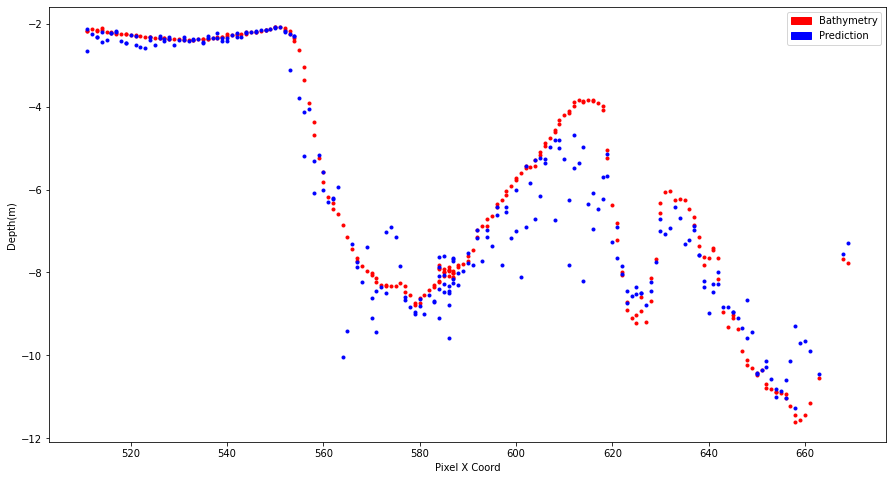

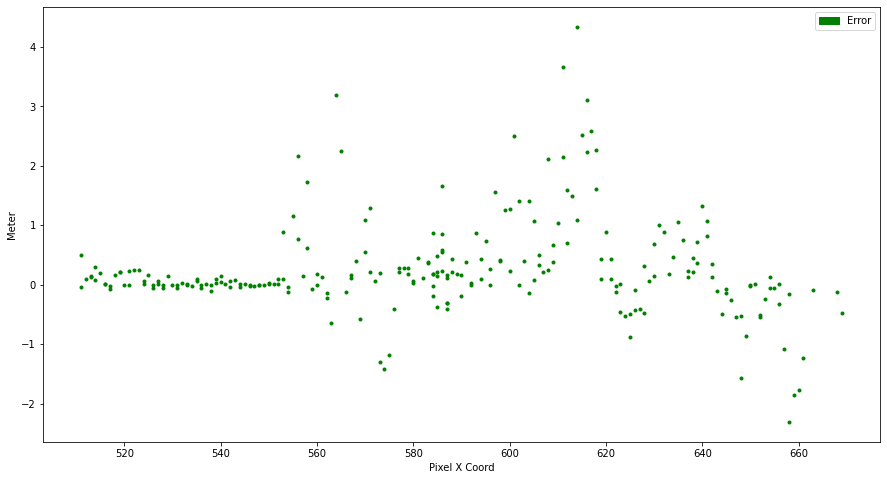

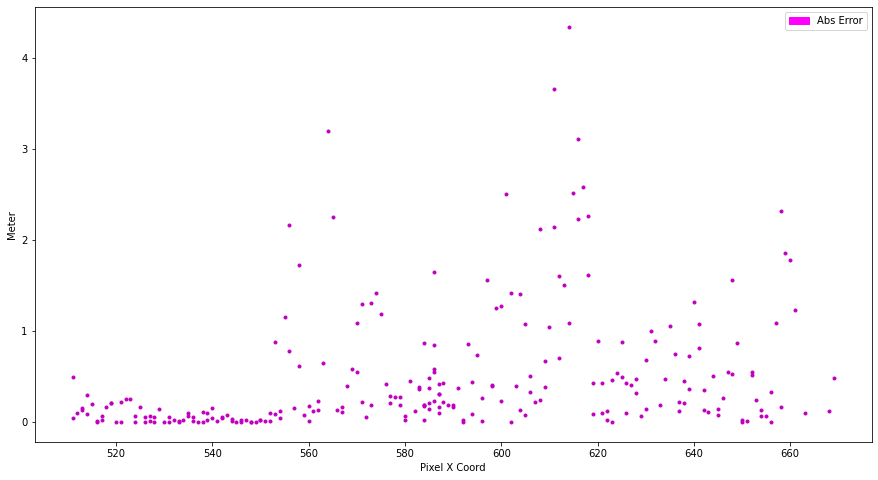

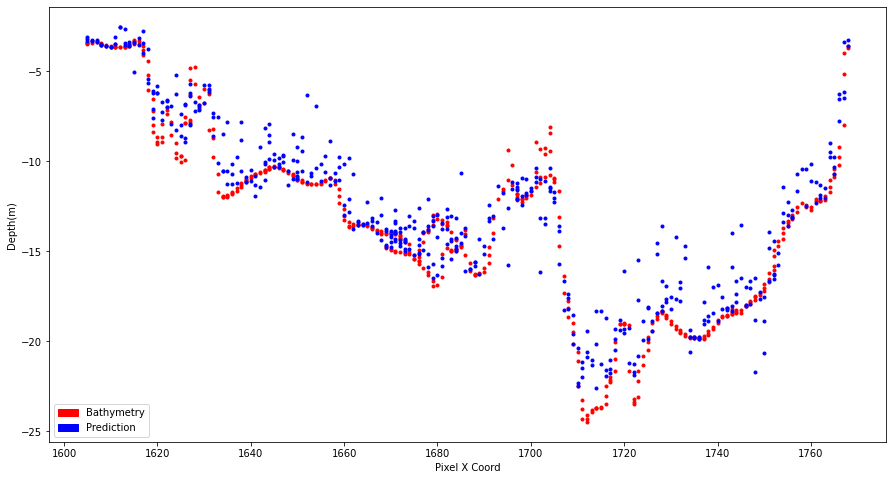

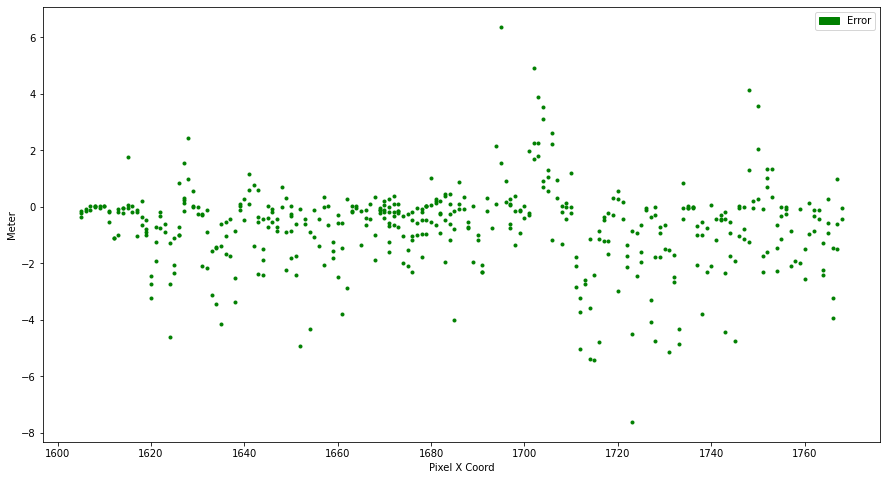

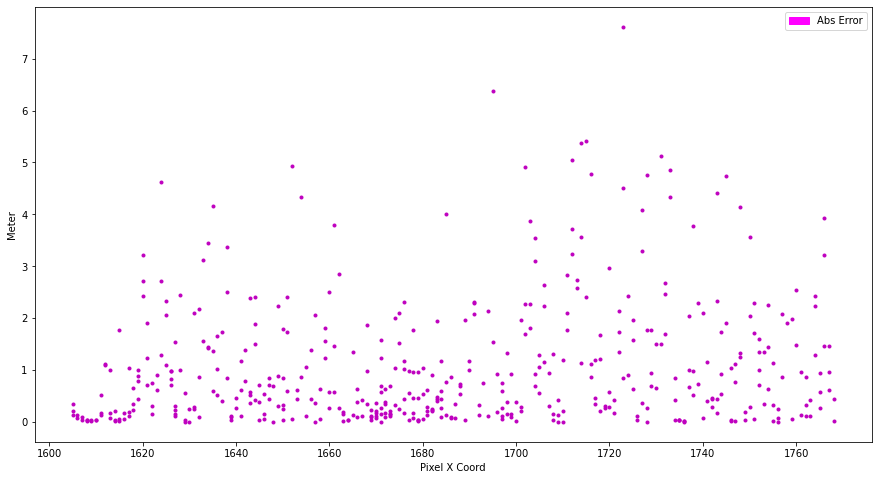

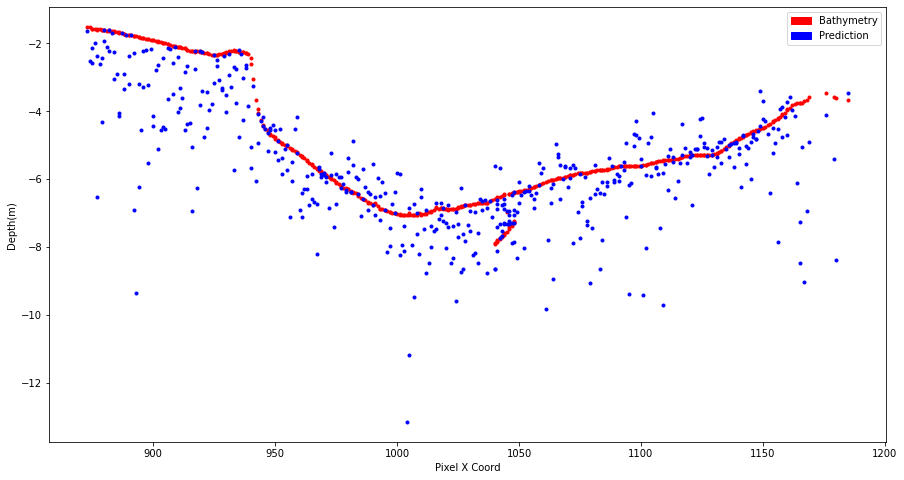

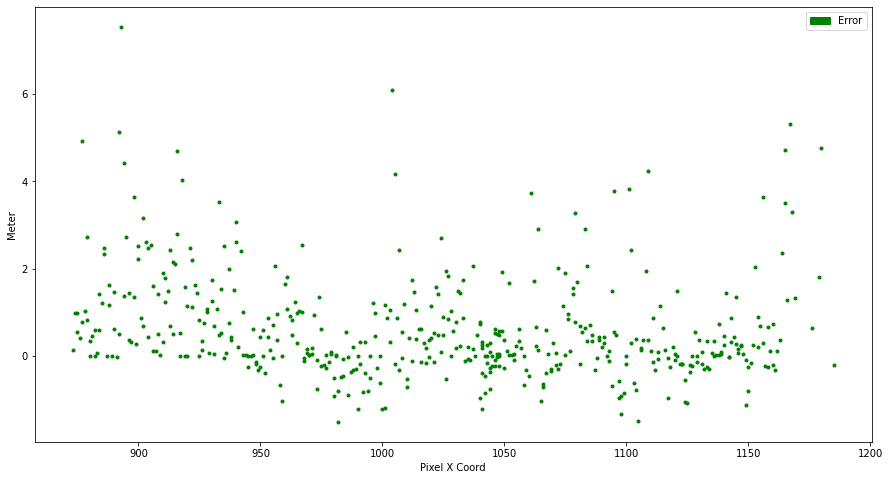

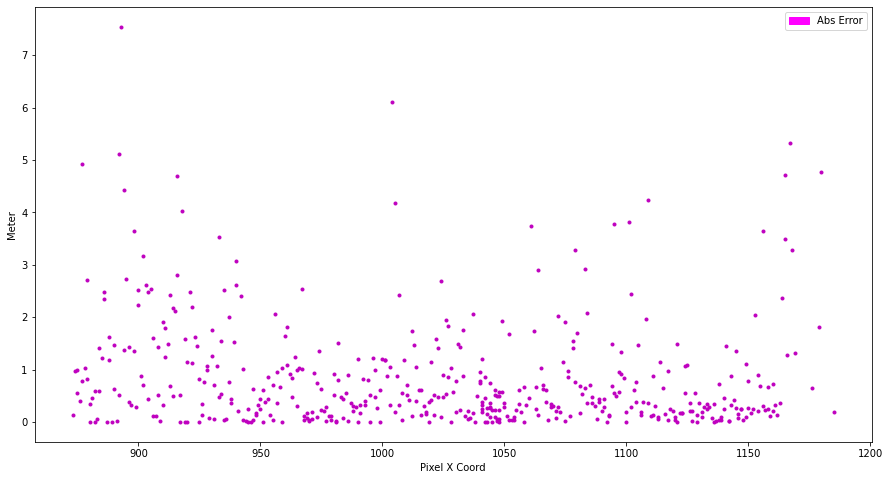

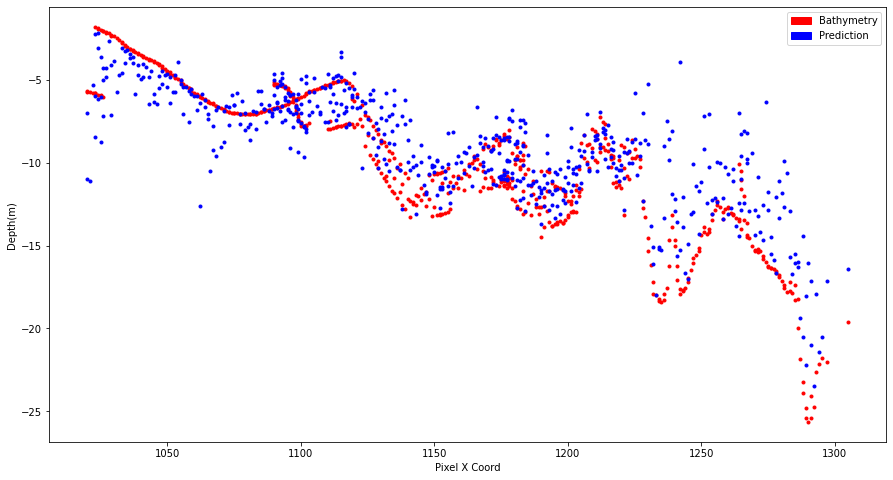

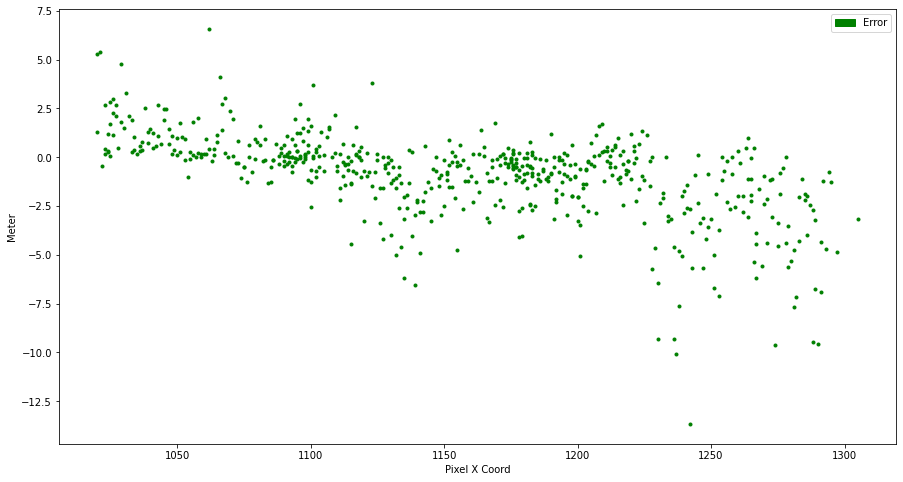

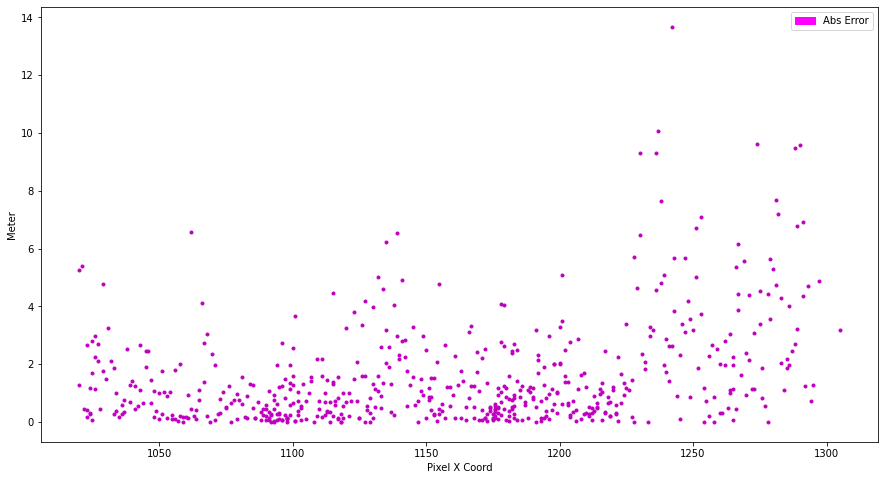

In [139]:
for i, coords in enumerate(transect_coords):
    generate_transect_charts(df_data,coords,transect_data_path,transects_image)